In [43]:
raw_data <- read.csv("Data_SSL_PSM_FULL.csv", sep=",", header=T, strip.white = T, na.strings = c("NA","NaN","","?"))
#Converting the "." in column names to "_"
names(raw_data)<-gsub("\\.", "_", names(raw_data))
cat("The Number of Rows in Initial Data is", nrow(raw_data))

The Number of Rows in Initial Data is 290208

In [44]:
final_features<-raw_data[,c('SSL_SCORE','PREDICTOR_RAT_AGE_AT_LATEST_ARREST','PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS',
                            'PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT','PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES','PREDICTOR_RAT_GANG_AFFILIATION', 
                           'PREDICTOR_RAT_NARCOTIC_ARRESTS','PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY','PREDICTOR_RAT_UUW_ARRESTS','RACE_CODE_CD')]

In [45]:
complete_data <- final_features[complete.cases(final_features),]

In [46]:
nrow(complete_data)

[1] 290123

In [47]:
library(MatchIt)
library(dplyr)
library(ggplot2)

In [49]:
complete_data %>%
  group_by(RACE_CODE_CD) %>%
  summarise(NUMBER_OF_PEOPLE = n(),
            MEAN_SSL_SCORE = mean(SSL_SCORE),
            STD_ERROR = sd(SSL_SCORE) / sqrt(NUMBER_OF_PEOPLE))

RACE_CODE_CD,NUMBER_OF_PEOPLE,MEAN_SSL_SCORE,STD_ERROR
0,207800,282.4735,0.1348997
1,82323,269.8436,0.1968091


In [50]:
with(complete_data, t.test(SSL_SCORE~ RACE_CODE_CD))


	Welch Two Sample t-test

data:  SSL_SCORE by RACE_CODE_CD
t = 52.933, df = 163540, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 12.16225 13.09756
sample estimates:
mean in group 0 mean in group 1 
       282.4735        269.8436 


In [54]:
ecls_cov <- c( 'PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS',
               'PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT','PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES','PREDICTOR_RAT_GANG_AFFILIATION', 
               'PREDICTOR_RAT_NARCOTIC_ARRESTS','PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY','PREDICTOR_RAT_UUW_ARRESTS')

In [55]:
complete_data %>%
  group_by(RACE_CODE_CD) %>%
  select(one_of(ecls_cov)) %>%
  summarise_all(funs(mean(., na.rm = T)))

Adding missing grouping variables: `RACE_CODE_CD`


RACE_CODE_CD,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS
0,0.032545717,0.052237729,0.16452358,0.23302695,0.4568624,-0.06429066,0.04921559
1,0.001931416,0.009487021,0.04773879,0.02988229,0.2183351,-0.02425446,0.01022800


In [56]:
lapply(ecls_cov, function(v) {
    t.test(complete_data[, v] ~ complete_data[, 'RACE_CODE_CD'])
})

[[1]]

	Welch Two Sample t-test

data:  complete_data[, v] by complete_data[, "RACE_CODE_CD"]
t = 67.166, df = 259810, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.02972094 0.03150766
sample estimates:
mean in group 0 mean in group 1 
    0.032545717     0.001931416 


[[2]]

	Welch Two Sample t-test

data:  complete_data[, v] by complete_data[, "RACE_CODE_CD"]
t = 63.371, df = 287350, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.04142849 0.04407293
sample estimates:
mean in group 0 mean in group 1 
    0.052237729     0.009487021 


[[3]]

	Welch Two Sample t-test

data:  complete_data[, v] by complete_data[, "RACE_CODE_CD"]
t = 85.723, df = 275900, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1141146 0.1194550
sample estimates:
mean in group 0 mean in group 1 
  

In [59]:
m_ps <- glm(RACE_CODE_CD ~ PREDICTOR_RAT_AGE_AT_LATEST_ARREST  + PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
            PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY +
            PREDICTOR_RAT_UUW_ARRESTS,
            family = binomial(), data = complete_data)
summary(m_ps)


Call:
glm(formula = RACE_CODE_CD ~ PREDICTOR_RAT_AGE_AT_LATEST_ARREST + 
    PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + 
    PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY + 
    PREDICTOR_RAT_UUW_ARRESTS, family = binomial(), data = complete_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1779  -0.9498  -0.6615   1.3804   4.8562  

Coefficients:
                                                Estimate Std. Error z value
(Intercept)                                    -0.506886   0.007673 -66.063
PREDICTOR_RAT_AGE_AT_LATEST_ARREST30-40         0.038930   0.011742   3.316
PREDICTOR_RAT_AGE_AT_LATEST_ARREST40-50        -0.032346   0.013022  -2.484
PREDICTOR_RAT_AGE_AT_LATEST_ARREST50-60        -0.133077   0.015061  -8.836
PREDICTOR_RAT_AGE_AT_LATEST_ARREST60-70        -0.008491   0.027385  -0.310
PREDICTOR_RAT_AGE_

In [60]:
prs_df <- data.frame(pr_score = predict(m_ps, type = "response"),
                     RACE_CODE_CD = m_ps$model$RACE_CODE_CD)
head(prs_df)

pr_score,RACE_CODE_CD
2.039232e-03,0
7.568827e-06,1
7.686198e-04,1
4.491296e-04,0
8.287402e-03,0
3.212957e-05,0


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


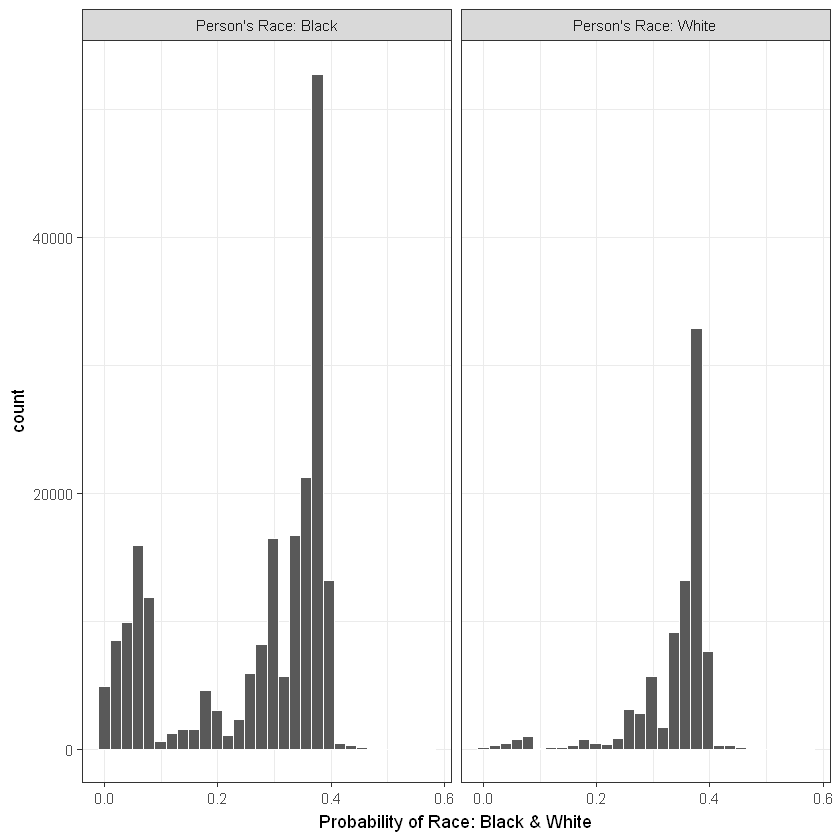

In [119]:
labs <- paste("Person's Race:", c("Black", "White"))
prs_df %>%
  mutate(RACE_CODE_CD = ifelse(RACE_CODE_CD == 0, labs[1], labs[2])) %>%
  ggplot(aes(x = pr_score)) +
  geom_histogram(color = "white") +
  facet_wrap(~RACE_CODE_CD) +
  xlab("Probability of Race: Black & White") +
  theme_bw()

In [64]:
ecls_nomiss <- complete_data %>%  # MatchIt does not allow missing values
  select(SSL_SCORE, RACE_CODE_CD,PREDICTOR_RAT_AGE_AT_LATEST_ARREST, one_of(ecls_cov)) %>%
  na.omit()


In [65]:
mod_match <- matchit(RACE_CODE_CD ~ PREDICTOR_RAT_AGE_AT_LATEST_ARREST  + PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
            PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY +
            PREDICTOR_RAT_UUW_ARRESTS,
                     method = "nearest", data = ecls_nomiss)

In [67]:
mod_match


Call: 
matchit(formula = RACE_CODE_CD ~ PREDICTOR_RAT_AGE_AT_LATEST_ARREST + 
    PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + 
    PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY + 
    PREDICTOR_RAT_UUW_ARRESTS, data = ecls_nomiss, method = "nearest")

Sample sizes:
          Control Treated
All        207800   82323
Matched     82323   82323
Unmatched  125477       0
Discarded       0       0


[1] "To identify the units, use first mouse button; to stop, use second."


integer(0)

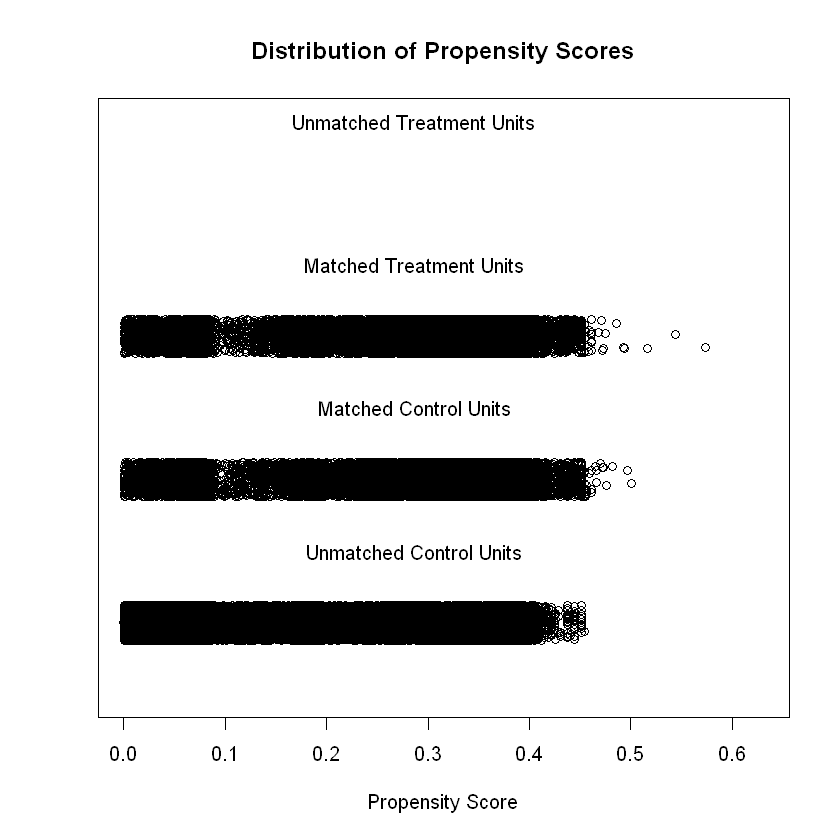

In [78]:
plot(mod_match, type = "jitter")

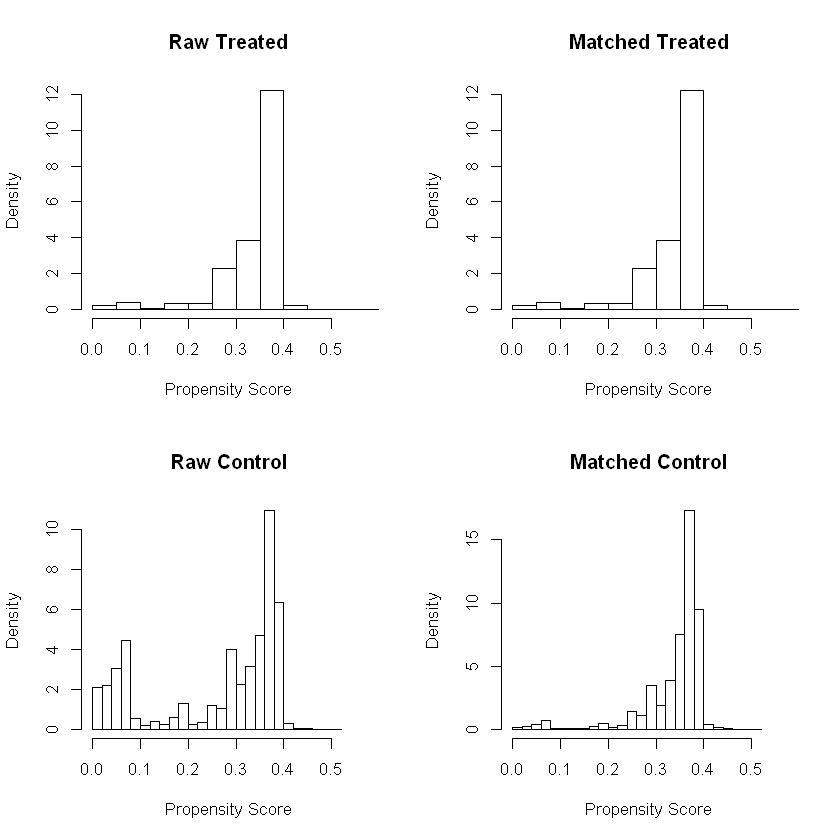

In [79]:
plot(mod_match, type = "hist")

In [70]:
dta_m <- match.data(mod_match)
dim(dta_m)

[1] 164646     12

In [71]:
head(dta_m)

,SSL_SCORE,RACE_CODE_CD,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,distance,weights
2,500,1,20-30,0,9,1,1,0,1.0,0,7.568827e-06,1
3,500,1,less than 20,1,2,1,1,3,1.0,0,7.686198e-04,1
13,485,1,less than 20,1,3,1,1,0,0.6,0,4.512925e-04,1
32,455,1,20-30,2,2,2,1,3,0.7,0,1.534399e-04,1
46,445,1,less than 20,0,1,4,1,2,0.5,0,1.665595e-03,1
57,439,0,less than 20,0,0,0,0,0,-0.1,0,2.887439e-01,1


In [74]:
fn_bal <- function(dta, variable) {
  dta$variable <- dta[, variable]
  
  dta$RACE_CODE_CD <- as.factor(dta$RACE_CODE_CD)
  support <- c(min(dta$variable), max(dta$variable))
  ggplot(dta, aes(x = distance, y = variable, color = RACE_CODE_CD)) +
    geom_point(alpha = 0.2, size = 1.3) +
    geom_smooth(method = "loess", se = F) +
    xlab("Propensity score") +
    ylab(variable) +
    theme_bw() +
    ylim(support)
}

Warning message:
"Removed 6 rows containing missing values (geom_smooth)."

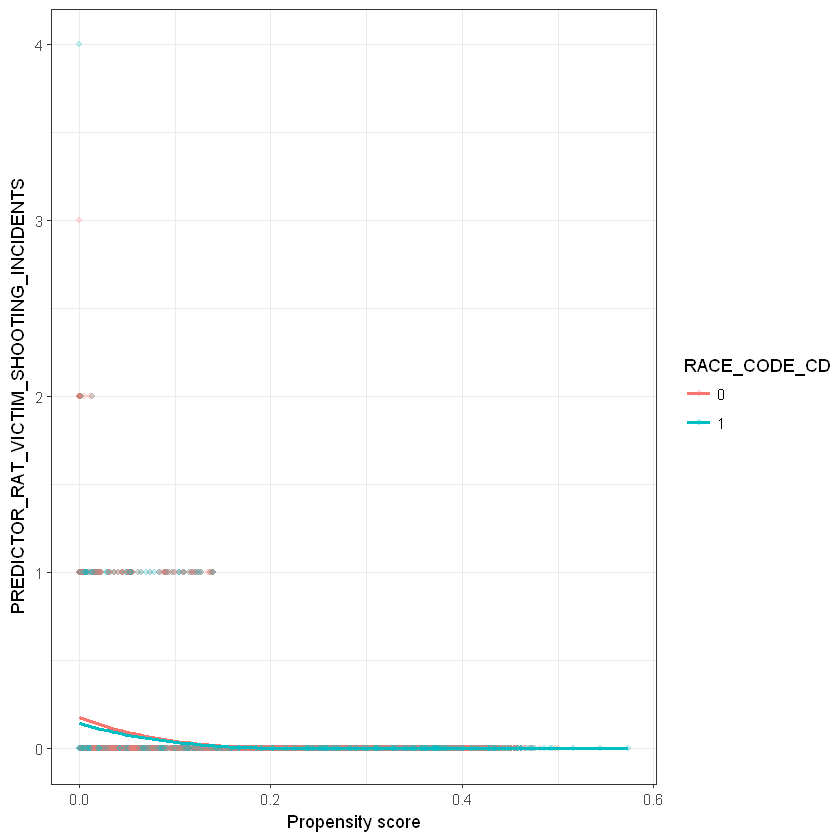

In [107]:
library(gridExtra)
grid.arrange(
fn_bal(dta_m, "PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS"))  



Warning message:
"Removed 15 rows containing missing values (geom_smooth)."

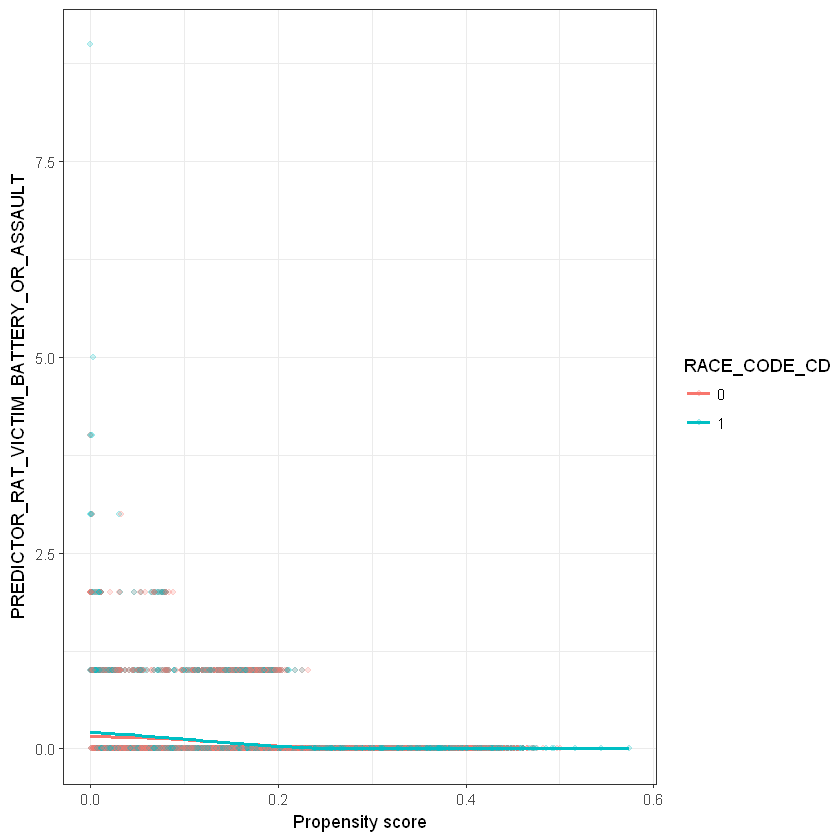

In [108]:
library(gridExtra)
grid.arrange(
fn_bal(dta_m, "PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT"))

Warning message:
"Removed 6 rows containing missing values (geom_smooth)."

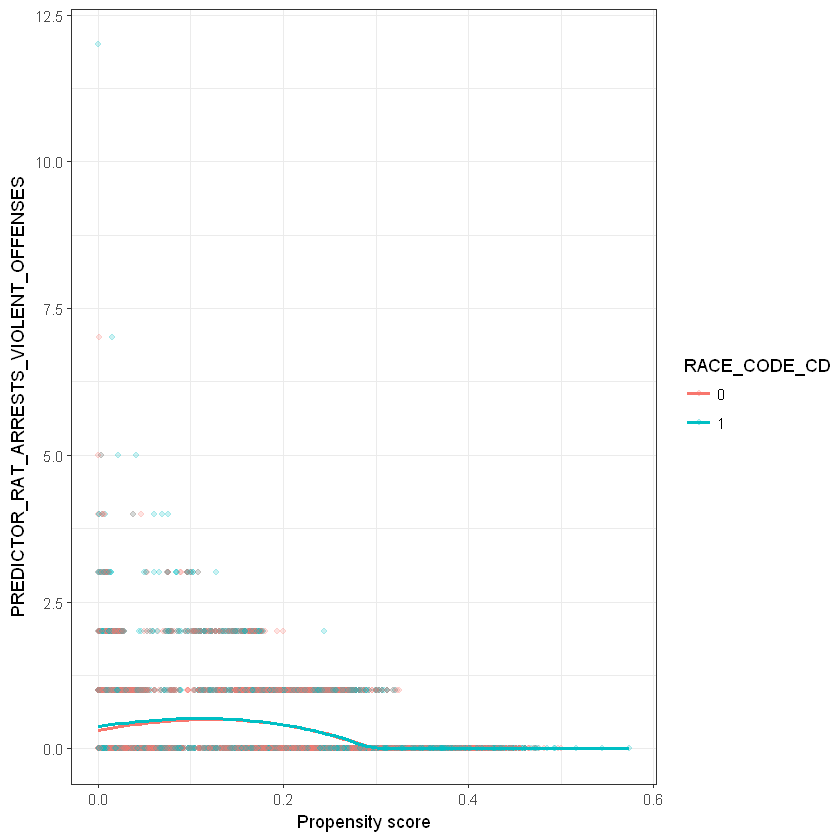

In [109]:
library(gridExtra)
grid.arrange(
fn_bal(dta_m, "PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES"))


Warning message:
"Removed 13 rows containing missing values (geom_smooth)."

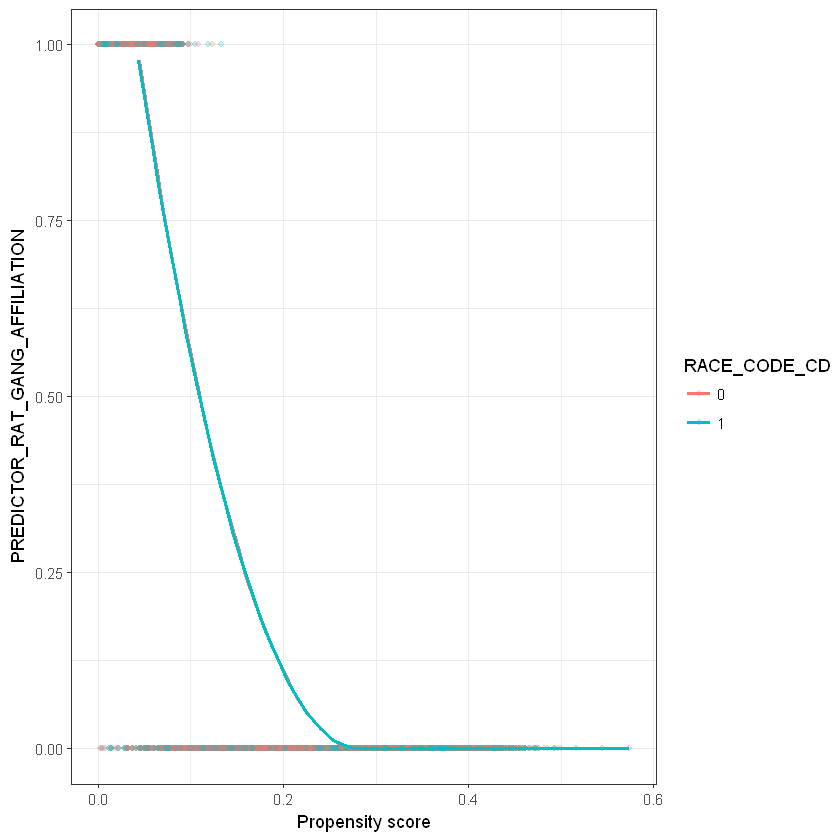

In [110]:
library(gridExtra)
grid.arrange(
fn_bal(dta_m, "PREDICTOR_RAT_GANG_AFFILIATION"))

Warning message:
"Removed 10 rows containing missing values (geom_smooth)."

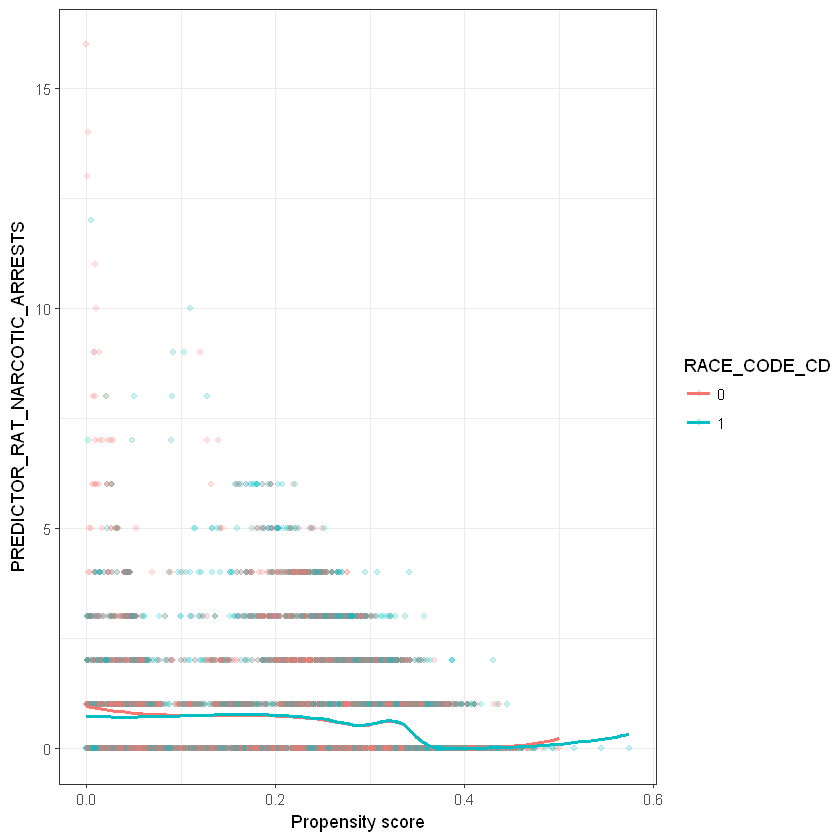

In [111]:
library(gridExtra)
grid.arrange(
fn_bal(dta_m,"PREDICTOR_RAT_NARCOTIC_ARRESTS"))


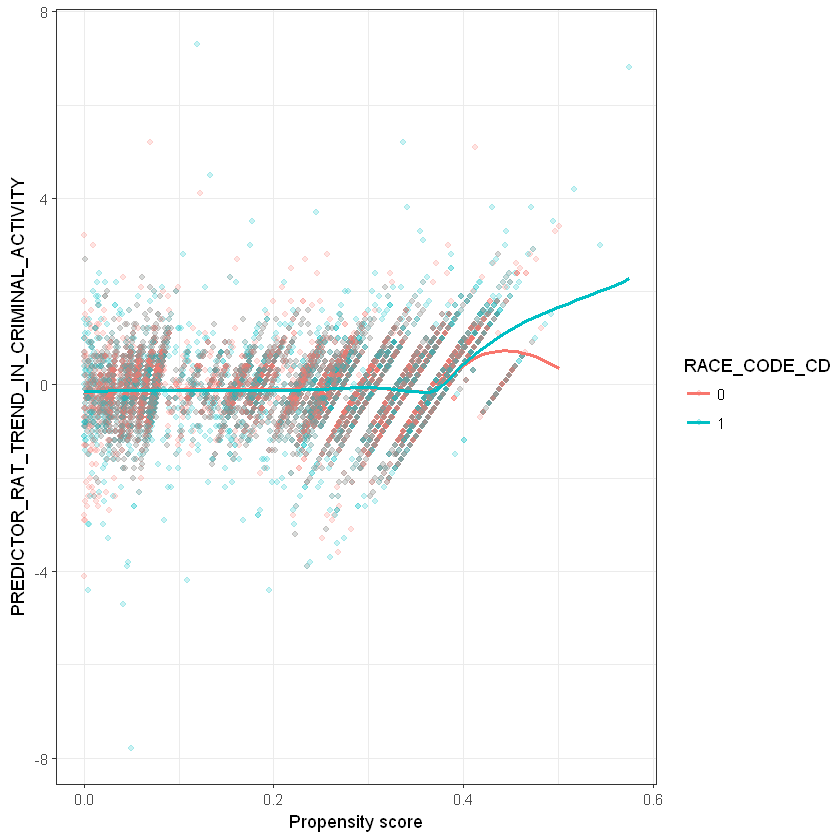

In [112]:
library(gridExtra)
grid.arrange(
fn_bal(dta_m,"PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY"))


Warning message:
"Removed 19 rows containing missing values (geom_smooth)."

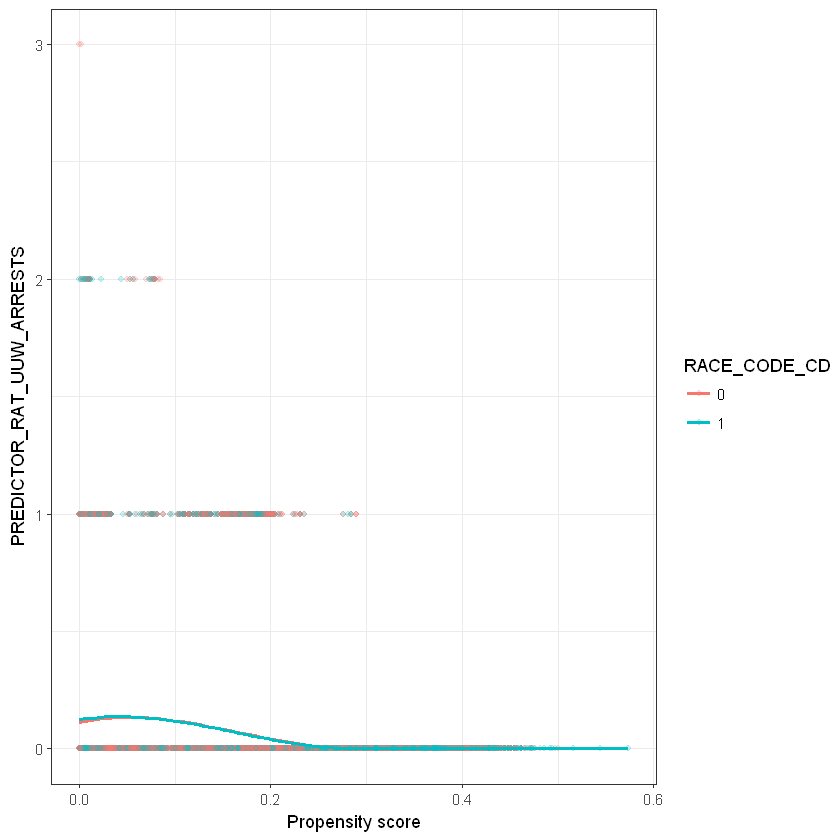

In [113]:
library(gridExtra)
grid.arrange(
fn_bal(dta_m,"PREDICTOR_RAT_UUW_ARRESTS"))

In [75]:
lm_treat1 <- lm(SSL_SCORE ~ RACE_CODE_CD, data = dta_m)
summary(lm_treat1)


Call:
lm(formula = SSL_SCORE ~ RACE_CODE_CD, data = dta_m)

Residuals:
    Min      1Q  Median      3Q     Max 
-217.65  -39.65   12.35   44.16  230.16 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  270.6509     0.1988 1361.224  < 2e-16 ***
RACE_CODE_CD  -0.8072     0.2812   -2.871  0.00409 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 57.05 on 164644 degrees of freedom
Multiple R-squared:  5.006e-05,	Adjusted R-squared:  4.398e-05 
F-statistic: 8.242 on 1 and 164644 DF,  p-value: 0.004094


In [77]:
lm_treat2 <- lm(SSL_SCORE ~ RACE_CODE_CD+PREDICTOR_RAT_AGE_AT_LATEST_ARREST  + PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
            PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY +
            PREDICTOR_RAT_UUW_ARRESTS, data = dta_m)
summary(lm_treat2)


Call:
lm(formula = SSL_SCORE ~ RACE_CODE_CD + PREDICTOR_RAT_AGE_AT_LATEST_ARREST + 
    PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + 
    PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY + 
    PREDICTOR_RAT_UUW_ARRESTS, data = dta_m)

Residuals:
     Min       1Q   Median       3Q      Max 
-139.779   -9.311    0.409    9.679  141.792 

Coefficients:
                                                 Estimate Std. Error  t value
(Intercept)                                     306.72842    0.06099  5029.14
RACE_CODE_CD                                     -0.89290    0.05976   -14.94
PREDICTOR_RAT_AGE_AT_LATEST_ARREST30-40         -41.24441    0.08082  -510.35
PREDICTOR_RAT_AGE_AT_LATEST_ARREST40-50         -86.17782    0.09045  -952.73
PREDICTOR_RAT_AGE_AT_LATEST_ARREST50-60        -128.25624    0.10588 -1211.28
PREDICTOR_RAT_AGE_AT_LATEST_ARREST